### Processing LADCP data and performing wavenumber calculation 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr 
import datetime as dt 
import pandas as pd
import scipy 
from scipy import signal
import netCDF4
import cmocean 
import numpy.matlib

plt.rcParams.update({'font.size': 16})
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%m')

In [4]:
path = '/home/vboatwright/OneDrive/Documents/SIO/projects/santalucia/data/processed_ship/'
filenames = ['LADCP_station1.mat','LADCP_station2.mat']

fn = path+filenames[0]

dat = scipy.io.loadmat(fn)
dat


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat May 31 15:06:28 2025',
 '__version__': '1.0',
 '__globals__': [],
 'LADCP1': array([[(array([[-121.75640472],
                [-121.75640228],
                [-121.75640652],
                [-121.75641544],
                [-121.75640587],
                [-121.75641022],
                [-121.75642848],
                [-121.75642779],
                [-121.75642319],
                [-121.75641735],
                [-121.75641881],
                [-121.75641233],
                [-121.756416  ],
                [-121.75642925],
                [-121.75643234],
                [-121.75643282],
                [-121.75643421],
                [-121.75643096]]), array([[34.72319291],
                [34.7231925 ],
                [34.72318212],
                [34.72317856],
                [34.72318214],
                [34.72318673],
                [34.7231698 ],
                [34.72316529],
               

(1,)

In [16]:

ladcp = dat['LADCP1'][0][0]

[cast_num,max_depth] = ladcp['u'].shape

u_vel = ladcp['u']
v_vel = ladcp['v']
p = ladcp['p']
lon = ladcp['lon']
lat = ladcp['lat']



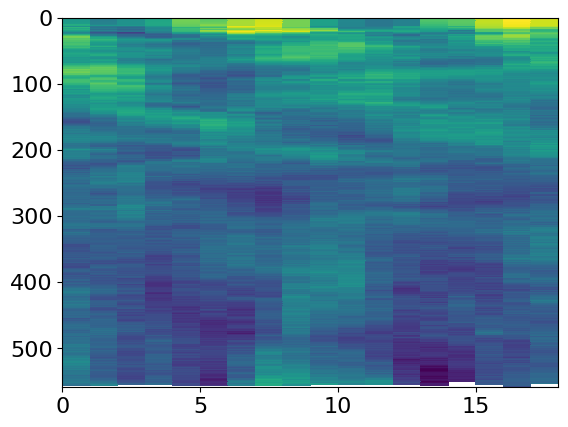

In [21]:
plt.pcolor(u_vel.T)
plt.gca().invert_yaxis()
plt.show()


In [33]:

# lets make rotary spectra 

[nt,nz] = u_vel.shape

rotary = np.ones((nt,nz))*np.nan
column_length = []

for it in np.arange(0,nt): 
    iz = np.where(~np.isnan(u_vel[it,:]))
    compu = u_vel[it,iz]+ 1j*v_vel[it,iz]
    rotary[it,iz] = compu 
    column_length.append(len(iz))

min_depth = np.nanmin(column_length) 
data = rotary[0:nt,0:min_depth]




/tmp/ipykernel_2086443/3155508731.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  rotary[it,iz] = compu


In [30]:
np.i*v_vel

AttributeError: module 'numpy' has no attribute 'i'

In [28]:
u_vel[0,iz]

array([[ 5.51759217e-02,  5.52279371e-02,  5.54880138e-02,
         5.59561518e-02,  5.66323513e-02,  5.75166121e-02,
         5.86089343e-02,  5.99093178e-02,  6.14177627e-02,
         6.39428523e-02,  6.68736225e-02,  9.37842399e-02,
         8.92401014e-02,  4.67315901e-02,  4.23024213e-02,
         1.05232960e-01,  1.15953245e-01,  8.48144968e-02,
         9.73586071e-02,  1.03235295e-01,  7.49490869e-02,
         5.26045837e-02,  4.28156719e-02,  1.85933243e-02,
         3.30769883e-02,  5.37060408e-02,  9.36963512e-02,
         1.38046334e-01,  1.75843671e-01,  1.70383652e-01,
         1.68537254e-01,  1.52996985e-01,  1.46767813e-01,
         1.50587647e-01,  1.66873888e-01,  1.39212318e-01,
         1.36558435e-01,  1.43795820e-01,  1.26431847e-01,
         1.32326760e-01,  1.36891285e-01,  1.33215741e-01,
         1.20899054e-01,  1.36924907e-01,  1.11298855e-01,
         1.20046216e-01,  1.08554837e-01,  9.64483030e-02,
         7.39997612e-02,  6.47198489e-02,  6.21864171e-0